# Intervalle de confiance

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [10]:
import matplotlib.ticker                         # here's where the formatter is
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-3,3)) 

In [11]:
from scipy.stats import stats
from scipy.stats import chi2
from scipy.stats import multivariate_normal

In [12]:
# Prepare your data
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x,y)

# Get the multivariate normal distribution
mu_x = np.mean(x)
sigma_x = np.std(x)
mu_y = np.mean(y)
sigma_y = np.std(y)
rho_xy=0.9
cov_xy=rho_xy*sigma_x*sigma_y

rv = multivariate_normal([mu_x, mu_y], [[sigma_x**2, cov_xy], [cov_xy, sigma_y**2]])

# Get the probability density
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
pd = rv.pdf(pos) # probability density function

In [13]:
sample=rv.rvs(100000)

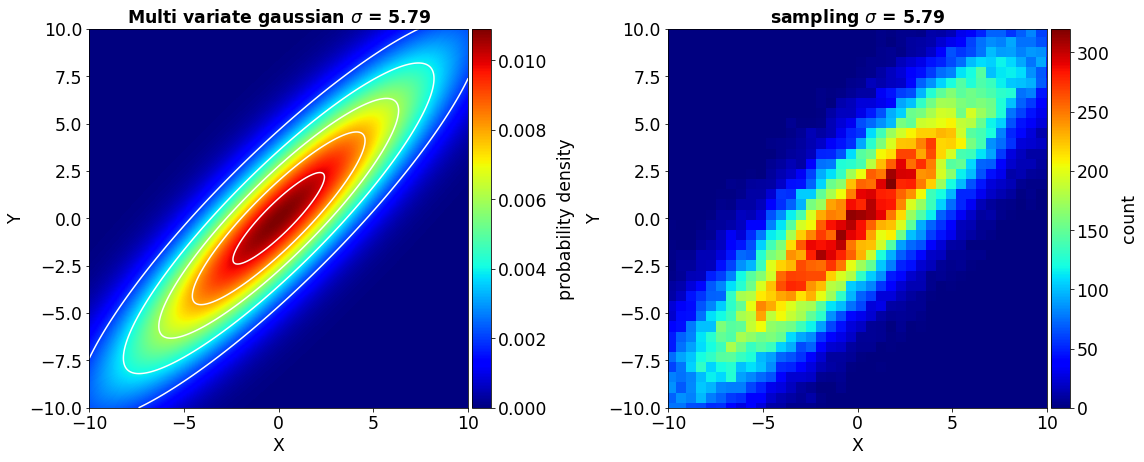

In [14]:
fig=plt.figure(figsize=(16,8))

ax1=fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
im1=ax1.imshow(pd,origin="lower",extent=(-10,10,-10,10),cmap="jet")
h1 = ax1.contour(x,y,pd,levels=5,colors='w')
cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('probability density', rotation=90)

ax1.set_xlabel("X")
ax1.set_ylabel("Y")
title="Multi variate gaussian $\\sigma$ = {:3.2f}".format(sigma_x)
ax1.set_title(title,fontweight="bold")
#ax.grid(color="w")

ax2=fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

counts, xedges, yedges, im2=ax2.hist2d(sample[:,0], sample[:, 1],bins=100, cmap="jet")
ax2.set_xlim(-10,10)
ax2.set_ylim(-10,10)


cbar2=fig.colorbar(im2,cax=cax2,format=cbformat)
cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('count', rotation=90)

ax2.set_aspect('equal')

ax2.set_xlabel("X")
ax2.set_ylabel("Y")
title="sampling $\\sigma$ = {:3.2f}".format(sigma_x)
ax2.set_title(title,fontweight="bold")
#ax.grid(color="w")

plt.tight_layout()

In [15]:
mean, var, skew, kurt = chi2.stats(1, moments='mvsk')

In [16]:
sample=chi2.rvs(df=1, loc=0, scale=1, size=1000, random_state=None)

Text(0.5, 0, '$\\chi^2$')

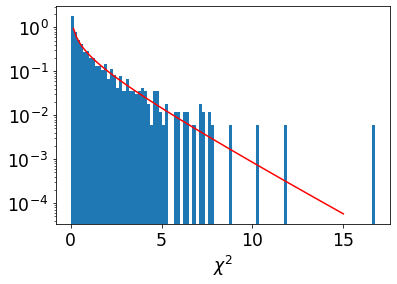

In [30]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
(counts,edges,a)=ax.hist(sample,bins=100,density=True)
x=np.linspace(0,15,100)
y=chi2.pdf(x,df=1)
ax.plot(x,y,"r-")
ax.set_yscale('log')
ax.set_xlabel('$\chi^2$')

In [18]:
CL=np.array([0.683,0.90,0.95,0.99])
NDF=np.arange(1,6)

In [19]:
for cl in CL:
    for ndf in NDF:
        Q=chi2.ppf(cl,df=ndf)
        print("cl= {}, ndf = {}, Q= {}".format(cl,ndf,Q))

cl= 0.683, ndf = 1, Q= 1.0012840694690475
cl= 0.683, ndf = 2, Q= 2.297707010209714
cl= 0.683, ndf = 3, Q= 3.529158544762805
cl= 0.683, ndf = 4, Q= 4.7222620842253304
cl= 0.683, ndf = 5, Q= 5.890700129190855
cl= 0.9, ndf = 1, Q= 2.705543454095414
cl= 0.9, ndf = 2, Q= 4.605170185988092
cl= 0.9, ndf = 3, Q= 6.251388631170327
cl= 0.9, ndf = 4, Q= 7.779440339734858
cl= 0.9, ndf = 5, Q= 9.236356899781118
cl= 0.95, ndf = 1, Q= 3.841458820694124
cl= 0.95, ndf = 2, Q= 5.991464547107979
cl= 0.95, ndf = 3, Q= 7.814727903251179
cl= 0.95, ndf = 4, Q= 9.487729036781154
cl= 0.95, ndf = 5, Q= 11.070497693516351
cl= 0.99, ndf = 1, Q= 6.6348966010212145
cl= 0.99, ndf = 2, Q= 9.21034037197618
cl= 0.99, ndf = 3, Q= 11.344866730144373
cl= 0.99, ndf = 4, Q= 13.276704135987622
cl= 0.99, ndf = 5, Q= 15.08627246938899
